# WEB MINING PROJECT

In [1]:
%matplotlib inline

import networkx as nx
from networkx.algorithms import community
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
pathData = r"DATASET-20240130\database\Everything\database_formated_for_NetworkX.graphml"
g = nx.read_graphml(pathData)

In [3]:
print(g)

MultiDiGraph with 109627 nodes and 311654 edges


# 4.1 Describe the Social Network and Mine Actionable Information from it
### Importation of data

### Creation of 6 subgraphs : 1 by eventType
Initially, we create a list containing the 'Event' nodes and a list containing the different eventType.

In [4]:
nodes = []
for node in g.nodes :
    if g.nodes[node]['labels'] == ':Event':
        nodes.append(node)

In [5]:
liste = []
for node in nodes : 
    liste.append(g.nodes[node]["eventType"])
set(liste)

{'bombing', 'earthquake', 'flood', 'shooting', 'typhoon', 'wildfire'}

In [6]:
bombing = []
earthquake = []
flood = []
shooting = []
typhoon = []
wildfire = []

for node in nodes :
    if g.nodes[node]["eventType"] == 'bombing':
        bombing.append(node)
    if g.nodes[node]["eventType"] == 'earthquake':
        earthquake.append(node)
    if g.nodes[node]["eventType"] == 'flood':
        flood.append(node)
    if g.nodes[node]["eventType"] == 'shooting':
        shooting.append(node)
    if g.nodes[node]["eventType"] == 'typhoon':
        typhoon.append(node)
    if g.nodes[node]["eventType"] == 'wildfire':
        wildfire.append(node)

Creation of lists of nodes (EVENT, USER and TWEET) for each eventType by looking at the nodes that are linked with EVENT edges in the previous lists.

In [7]:
bombing_edges = []
earthquake_edges = []
flood_edges = []
shooting_edges = []
typhoon_edges = []
wildfire_edges = []

edges = list(g.edges())

for i in range(len(edges)):
    for node in bombing :
        if str(node) in edges[i] : 
            bombing_edges.append(edges[i])
    for node in earthquake :
        if str(node) in edges[i] : 
            earthquake_edges.append(edges[i])
    for node in flood :
        if str(node) in edges[i] : 
            flood_edges.append(edges[i])
    for node in shooting :
        if str(node) in edges[i] : 
            shooting_edges.append(edges[i])
    for node in typhoon :
        if str(node) in edges[i] : 
            typhoon_edges.append(edges[i])
    for node in wildfire :
        if str(node) in edges[i] : 
            wildfire_edges.append(edges[i])   

initialization of sub-graphs

In [8]:
graph_bombing_nodes = nx.Graph()
graph_bombing_nodes.add_edges_from(bombing_edges)
g_bombing = g.subgraph(graph_bombing_nodes.nodes())
print(g_bombing)

MultiDiGraph with 5518 nodes and 8427 edges


In [9]:
graph_earthquake_nodes = nx.Graph()
graph_earthquake_nodes.add_edges_from(earthquake_edges)
g_earthquake = g.subgraph(graph_earthquake_nodes.nodes())
print(g_earthquake)

MultiDiGraph with 17843 nodes and 28769 edges


In [10]:
graph_flood_nodes = nx.Graph()
graph_flood_nodes.add_edges_from(flood_edges)
g_flood = g.subgraph(graph_flood_nodes.nodes())
print(g_flood)

MultiDiGraph with 7979 nodes and 14017 edges


In [11]:
graph_shooting_nodes = nx.Graph()
graph_shooting_nodes.add_edges_from(shooting_edges)
g_shooting = g.subgraph(graph_shooting_nodes.nodes())
print(g_shooting)

MultiDiGraph with 10804 nodes and 18345 edges


In [12]:
graph_typhoon_nodes = nx.Graph()
graph_typhoon_nodes.add_edges_from(typhoon_edges)
g_typhoon = g.subgraph(graph_typhoon_nodes.nodes())
print(g_typhoon)

MultiDiGraph with 16023 nodes and 27262 edges


In [13]:
graph_wildfire_nodes = nx.Graph()
graph_wildfire_nodes.add_edges_from(wildfire_edges)
g_wildfire = g.subgraph(graph_wildfire_nodes.nodes())
print(g_wildfire)

MultiDiGraph with 9377 nodes and 18671 edges


### The distributions of the tweet posts and their main topics w.r.t levels of criticality among the “Low”, “Medium”, “High” and “Critical”.

In [20]:
sub_graph = [g_bombing , g_earthquake , g_flood , g_shooting , g_typhoon , g_wildfire]
sub_graph_name = ["g_bombing" , "g_earthquake" , "g_flood" , "g_shooting" , "g_typhoon" , "g_wildfire"]
annotation_postPriority = ["Low", "Medium", "High" , "Critical"]

In [15]:
freq_list_global = []

for i in range (len(sub_graph)) : #for every subrgaph : 
    
    freq_list = []
    
    nodes_tweet = []
    
    for node in sub_graph[i].nodes :
        if sub_graph[i].nodes[node]['labels'] == ':Tweet':
            nodes_tweet.append(node)
            
    for j in range (len(annotation_postPriority)) : #for every annotation
        
        liste_nodes_annotation_i = []
        for node in nodes_tweet :
            if g.nodes[node]["annotation_postPriority"] == annotation_postPriority[j] :
                liste_nodes_annotation_i.append(node)
        freq = len(liste_nodes_annotation_i)/len(nodes_tweet)
        freq_list.append(freq) 
        
    freq_list_global.append(freq_list) 
    
freq_list_global        

[[0.8077614085519224,
  0.11498383039885016,
  0.05821056413941789,
  0.019044196909809557],
 [0.6761194029850747,
  0.1783582089552239,
  0.14029850746268657,
  0.0052238805970149255],
 [0.5962397179788484,
  0.25687426556991777,
  0.13842538190364279,
  0.00846063454759107],
 [0.7663248785752833,
  0.14265155603525814,
  0.07393416082029142,
  0.017089404569167115],
 [0.6957253450016829,
  0.16874228654773926,
  0.12375182317962527,
  0.011668349601705374],
 [0.6614745586708204,
  0.21564555209415023,
  0.0993423329871928,
  0.02336448598130841]]

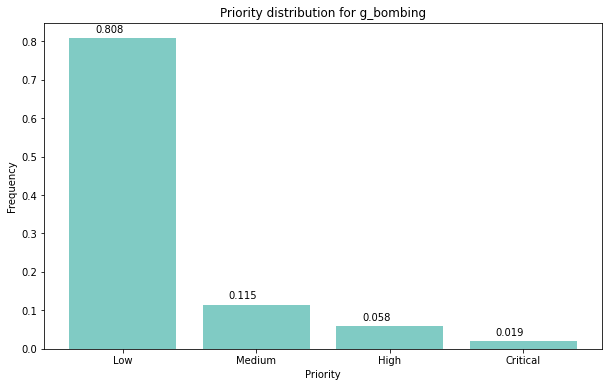

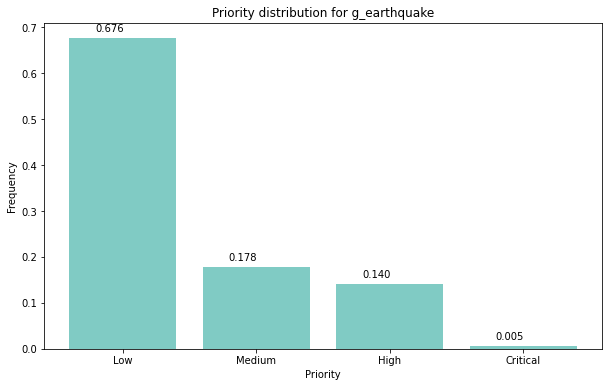

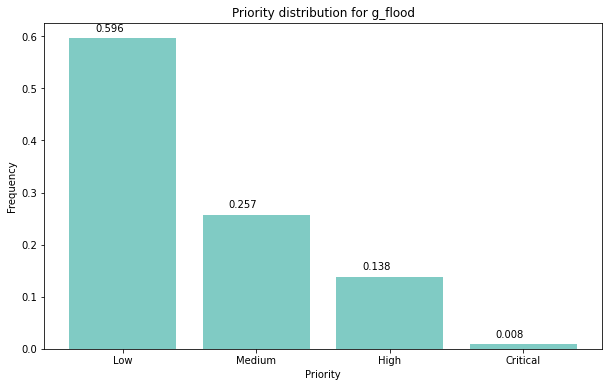

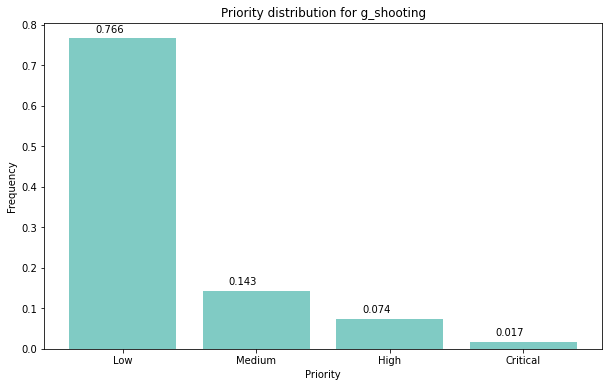

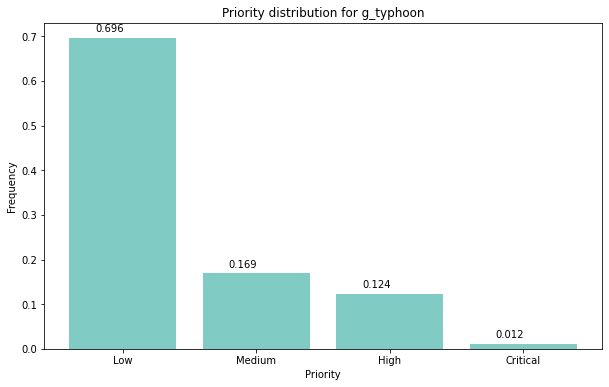

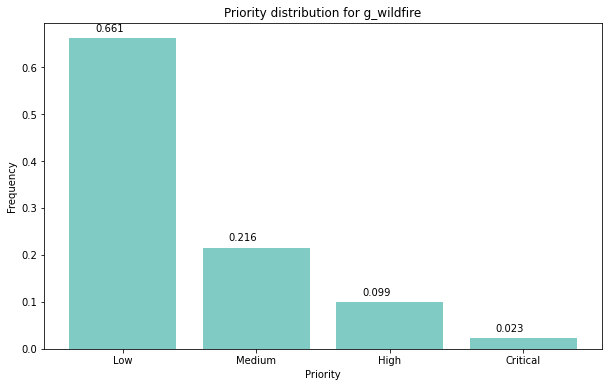

In [29]:
for i in range(len(sub_graph_name)):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(annotation_postPriority, freq_list_global[i], color='#80CBC4')
    plt.title(f'Priority distribution for {sub_graph_name[i]}')
    plt.xlabel('Priority')
    plt.ylabel('Frequency')
    for bar, value in zip(bars, freq_list_global[i]):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.3f}', ha='center', va='bottom')
    plt.savefig(f'Graph_priority_distribution/{sub_graph_name[i]}.jpg')
    plt.show()
    